In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ttc = pd.read_csv('ttc_delays_cleaned.csv')

In [5]:
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description
0,1/1/2014,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron
1,1/1/2014,02:40,Wednesday,SHEPPARD,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN
2,1/1/2014,03:10,Wednesday,LANSDOWNE,SUDP,3,8,West,Bloor-Danforth,5116.0,LANSDOWNE STATION,BD,Disorderly Patron
3,1/1/2014,03:20,Wednesday,BLOOR,MUSAN,5,10,South,Yonge-University,5386.0,BLOOR STATION,YU,Unsanitary Vehicle
4,1/1/2014,03:29,Wednesday,DUFFERIN,MUPAA,0,0,East,Bloor-Danforth,5174.0,DUFFERIN STATION,BD,Passenger Assistance Alarm Activated - No Trou...


## Look at each line

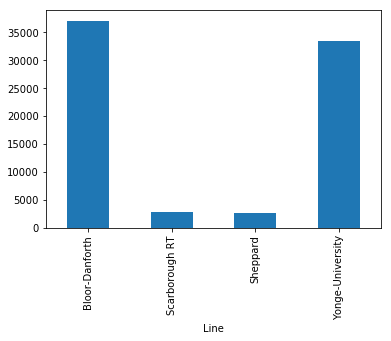

In [6]:
# Looking at the number of delays on each line
lines = ttc.groupby('Line')
line_size = lines.size()
line_size
line_size.plot.bar()
plt.show()

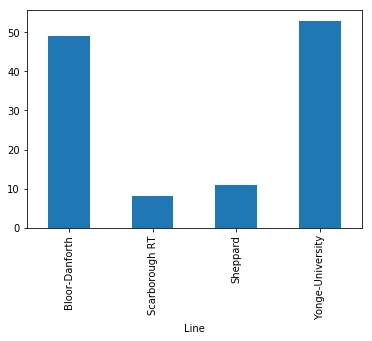

In [7]:
# Looking at the number of stops on each line
num_stop_per_line = ttc[['Line', 'Station']].drop_duplicates()
num_stop_per_line = num_stop_per_line.groupby('Line').size()
num_stop_per_line.plot.bar()
plt.show()

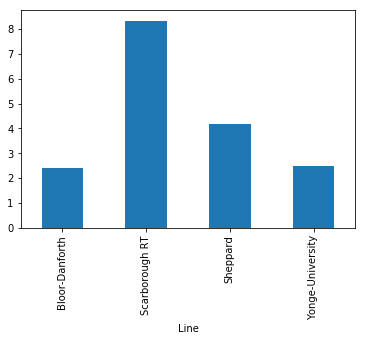

In [8]:
# Looks at the average min gap for each line
mean_line_gap = ttc.groupby('Line')['Min Gap'].mean()
mean_line_gap.plot.bar()
plt.show()

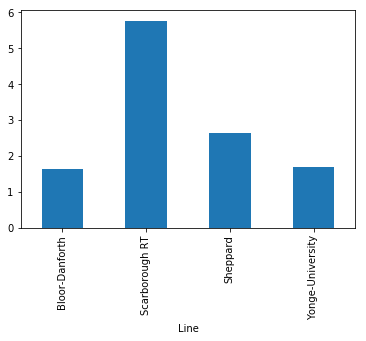

In [9]:
# Looks at the average min delay for each line
mean_line_gap = ttc.groupby('Line')['Min Delay'].mean()
mean_line_gap.plot.bar()
plt.show()

## Direction

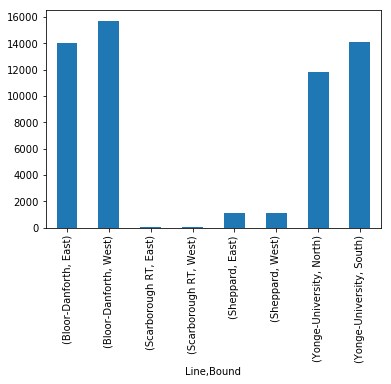

In [10]:
direction = ttc.groupby(['Line', 'Bound'])
direction.size().plot.bar()
plt.show()

## Weekly Breakdown

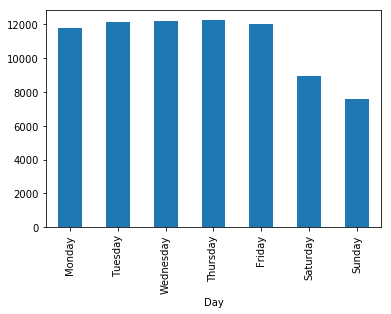

In [11]:
# Convert Day to Categorical so it's sorted Monday --> Sunday instead of alphabetically
ttc['Day'] = pd.Categorical(ttc['Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
days = ttc.groupby('Day').size()
days.plot.bar()
plt.show()

In [12]:
# days_per_line 
days_per_line = ttc.pivot_table(index='Day', columns='Line', aggfunc=len, values='Time')
days_per_line

Line,Bloor-Danforth,Scarborough RT,Sheppard,Yonge-University
Day,,,,
Monday,5678,425,436,5128
Tuesday,5904,458,375,5301
Wednesday,6025,488,369,5173
Thursday,5954,462,429,5269
Friday,5885,401,390,5198
Saturday,4168,299,339,3975
Sunday,3469,303,352,3392


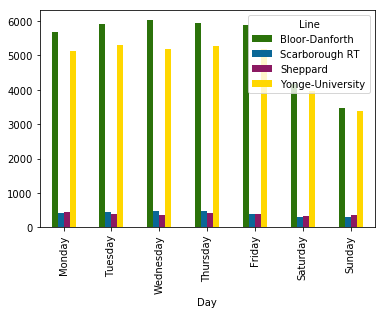

In [13]:
days_per_line.plot.bar(color=['#2b720a', '#0a6797', '#8b1962', '#FFD700'])
plt.show()

In [14]:
days_ct = pd.crosstab(ttc.Day, ttc.Line, normalize='columns')
days_ct

Line,Bloor-Danforth,Scarborough RT,Sheppard,Yonge-University
Day,,,,
Monday,0.153116,0.149859,0.162082,0.153368
Tuesday,0.159210,0.161495,0.139405,0.158542
Wednesday,0.162473,0.172073,0.137175,0.154713
Thursday,0.160559,0.162906,0.159480,0.157585
Friday,0.158698,0.141396,0.144981,0.155461
Saturday,0.112397,0.105430,0.126022,0.118884
Sunday,0.093547,0.106841,0.130855,0.101448


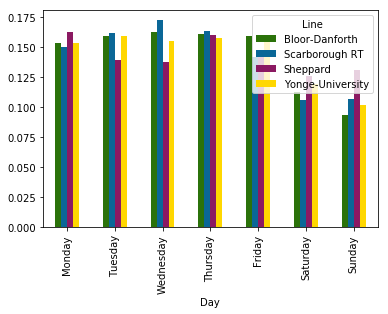

In [15]:
days_ct.plot.bar(color=['#2b720a', '#0a6797', '#8b1962', '#FFD700'])
plt.show()

## Time of day

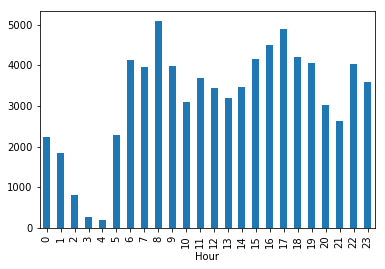

In [16]:
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour
ttc.groupby('Hour').size().plot.bar()
plt.show()

In [17]:
group = ttc.pivot_table(index='Hour', columns='Line', aggfunc=len, values='Time')
group.head()

Line,Bloor-Danforth,Scarborough RT,Sheppard,Yonge-University
Hour,,,,
0,1090,71,107,960
1,937,67,87,752
2,420,27,65,304
3,108,20,7,120
4,76,13,8,94


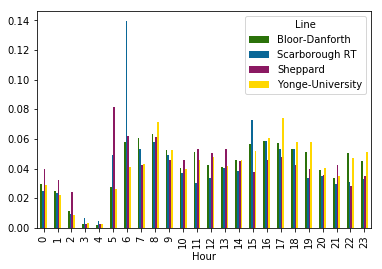

In [18]:
ct = pd.crosstab(ttc.Hour, ttc.Line, normalize='columns')
ct
ct.plot.bar(color=['#2b720a', '#0a6797', '#8b1962', '#FFD700'])
plt.show()

In [19]:
hour_pivot.plot.bar(color=['#2b720a', '#0a6797', '#8b1962', '#FFD700'])
plt.show()

NameError: name 'hour_pivot' is not defined

TODO 3d bar (https://stackoverflow.com/questions/23880138/display-a-3d-bar-graph-using-transparency-and-multiple-colors-in-matplotlib)

### Time and Direction

In [ ]:
time_and_bound = pd.crosstab(ttc.Hour, ttc.Bound, normalize='columns')
time_and_bound
time_and_bound.plot.bar()
plt.show()

In [ ]:
north_south = ttc[(ttc['Bound'] == 'South') | (ttc['Bound'] == 'North')]
time_and_bound_ns = pd.crosstab(north_south.Hour, north_south.Bound, normalize='columns')
time_and_bound_ns
time_and_bound_ns.plot.bar()
plt.show()

In [ ]:
east_west = ttc[(ttc['Bound'] == 'East') | (ttc['Bound'] == 'West')]
time_and_bound_ew = pd.crosstab(east_west.Hour, east_west.Bound, normalize='columns')
time_and_bound_ew
time_and_bound_ew.plot.bar()
plt.show()

## Worse Delays

In [ ]:
line_delay_avg = ttc.groupby(['Line'])['Min Delay'].mean()
line_delay_avg

In [ ]:
day_delay_avg = ttc.groupby(['Day'])['Min Delay'].mean()
day_delay_avg

In [ ]:
bound_delay_avg = ttc.groupby(['Bound'])['Min Delay'].mean()
bound_delay_avg

## Delay and Gap

In [ ]:
# gap_delay_mean = ttc.groupby('Min Gap')['Min Delay'].mean()
gap_delay_mean = ttc.groupby('Min Delay')['Min Gap'].mean()
gap_delay_mean.head()
# gap_delay_mean.plot()
# plt.show()

In [ ]:
smaller_delay = ttc[ttc['Min Gap'] < 20]
smaller_delay['Min Gap'].value_counts().sort_index().plot()
plt.show()

In [ ]:
smaller_delay.groupby('Min Gap')['Min Delay'].mean().plot()
plt.show()

In [ ]:
TODO: Box Plot

In [ ]:
TODO: Scatter plot?

## Codes

In [40]:
ttc.groupby(['Code Description']).size()
ttc.pivot_table(index='Line', columns='Code Description', aggfunc=len)

# ttc.groupby(['Line', 'Code Description']).size().sort_values(ascending=False).head(20)
groups = ttc.groupby(['Line'], as_index=False)

final = {}

for title, g in groups:
   final[title] = g.groupby('Code Description').size().sort_values(ascending=False).head(5)

with_apply = ttc.groupby(['Line'], as_index=False).apply(lambda g: g.groupby('Code Description').size().sort_values(ascending=False).head(3))


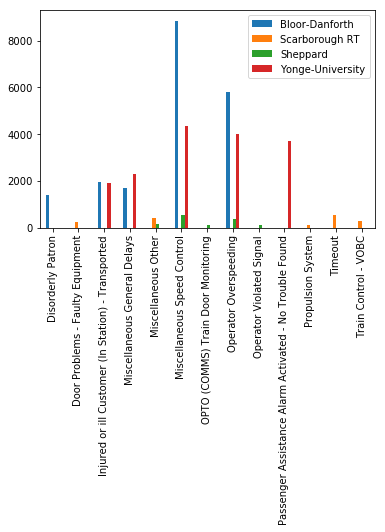

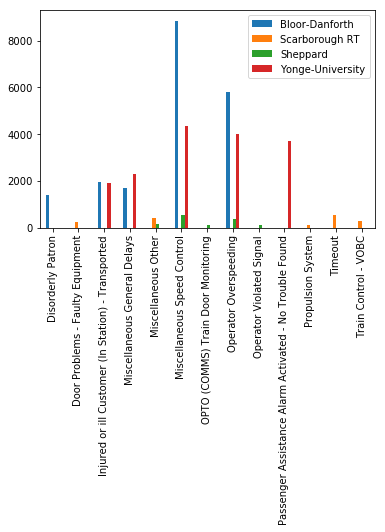

In [54]:
type(final['Bloor-Danforth'])
# df = pd.DataFrame()
# df['BD'] = final['Bloor-Danforth']
# df['YU'] = final['Yonge-University']


df = pd.DataFrame(final)
df.plot.bar()
plt.show()

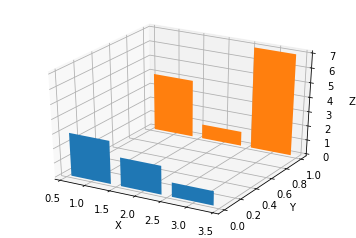

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

'''
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    print('xs', xs)
    print('ys', ys)
    print('zs', z)
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)
'''


bd = final['Bloor-Danforth']
type(bd)
bd.index

ax.bar([1,2,3], [3,2,1], zs=0,  zdir='y')
ax.bar([1,2,3], [4,1,7], zs=1,  zdir='y')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()

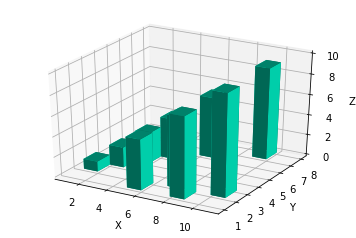

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = [1,2,3,4,5,6,7,8,9,10]
ypos = [2,3,4,5,1,6,2,1,7,2]
num_elements = len(xpos)
zpos = [0,0,0,0,0,0,0,0,0,0]
dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')



ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
plt.show()

## Time Long Term